#Web Scraping from Polygon.io API and Time Series Analysis using SVM

In [48]:
import requests
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [37]:
url = f'https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2022-01-01/2023-12-31?adjusted=true&sort=asc&apiKey={your_api_key}'

In [38]:
response = requests.get(url)
data = response.json()

In [39]:
print(data)

{'ticker': 'AAPL', 'queryCount': 389, 'resultsCount': 389, 'adjusted': True, 'results': [{'v': 84784326.0, 'vw': 132.5738, 'o': 133.13, 'c': 132.76, 'h': 133.89, 'l': 131.48, 't': 1655179200000, 'n': 674981}, {'v': 91532972.0, 'vw': 134.625, 'o': 134.29, 'c': 135.43, 'h': 137.34, 'l': 132.16, 't': 1655265600000, 'n': 733275}, {'v': 107961508.0, 'vw': 130.4622, 'o': 132.08, 'c': 130.06, 'h': 132.39, 'l': 129.04, 't': 1655352000000, 'n': 909222}, {'v': 134520290.0, 'vw': 131.491, 'o': 130.065, 'c': 131.56, 'h': 133.079, 'l': 129.81, 't': 1655438400000, 'n': 744035}, {'v': 81000488.0, 'vw': 135.8508, 'o': 133.42, 'c': 135.87, 'h': 137.06, 'l': 133.32, 't': 1655784000000, 'n': 604547}, {'v': 73409234.0, 'vw': 135.8581, 'o': 134.79, 'c': 135.35, 'h': 137.76, 'l': 133.91, 't': 1655870400000, 'n': 530526}, {'v': 72433768.0, 'vw': 137.2859, 'o': 136.82, 'c': 138.27, 'h': 138.59, 'l': 135.63, 't': 1655956800000, 'n': 554898}, {'v': 88401837.0, 'vw': 140.8332, 'o': 139.9, 'c': 141.66, 'h': 141.9

In [40]:
# Extract relevant data
dates = [item['t'] for item in data['results']]
closing_prices = [item['c'] for item in data['results']]

In [41]:
# Create DataFrame
df = pd.DataFrame({
    'date': pd.to_datetime(dates, unit='ms'),
    'closing_price': closing_prices
})

In [42]:
df.head()

,date,closing_price
0,2022-06-14 04:00:00,132.76
1,2022-06-15 04:00:00,135.43
2,2022-06-16 04:00:00,130.06
3,2022-06-17 04:00:00,131.56
4,2022-06-21 04:00:00,135.87


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           389 non-null    datetime64[ns]
 1   closing_price  389 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.2 KB


In [29]:
df.to_csv('stock_market_data.csv')

In [44]:
# Data Preparation
df['price_change'] = df['closing_price'].pct_change()
df['moving_average'] = df['closing_price'].rolling(window=5).mean()
df = df.dropna()

In [45]:
df.head()

,date,closing_price,price_change,moving_average
4,2022-06-21 04:00:00,135.87,0.032761,133.136
5,2022-06-22 04:00:00,135.35,-0.003827,133.654
6,2022-06-23 04:00:00,138.27,0.021574,134.222
7,2022-06-24 04:00:00,141.66,0.024517,136.542
8,2022-06-27 04:00:00,141.66,0.000000,138.562


In [46]:
# Features and Target
X = df[['price_change', 'moving_average']].values
y = df['closing_price'].values

In [49]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [50]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Model Development
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

SVR(C=100, gamma=0.1)

In [52]:
# Predictions
y_pred = svr.predict(X_test_scaled)
y_pred

array([176.84131073, 175.81611859, 178.62957462, 175.95678839,
       178.82423753, 177.86501586, 174.19275683, 175.40488119,
       177.51838479, 177.50407013, 171.52168581, 172.46282348,
       173.41171199, 172.91814861, 174.22722568, 170.84746306,
       173.86192357, 174.71062126, 177.10957666, 177.27325145,
       176.6664213 , 179.69232177, 180.46087294, 178.34528283,
       179.78480716, 178.26500036, 177.65996193, 177.38872807,
       174.26164375, 175.41843871, 174.94532664, 171.52932477,
       168.35669082, 172.11191782, 172.21318535, 170.21063187,
       173.13708103, 175.54652942, 173.44976902, 178.311412  ,
       180.54482827, 181.16080035, 180.84077354, 185.98682798,
       183.04989372, 187.49126393, 187.07085551, 189.33786606,
       188.72314431, 191.28984631, 190.00757128, 191.81843852,
       190.22806301, 191.23880345, 191.64521625, 190.07171543,
       191.11797067, 191.84925294, 189.28602379, 193.38036266,
       191.08329316, 194.05602775, 194.59258828, 192.06

In [53]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.9214763758535671


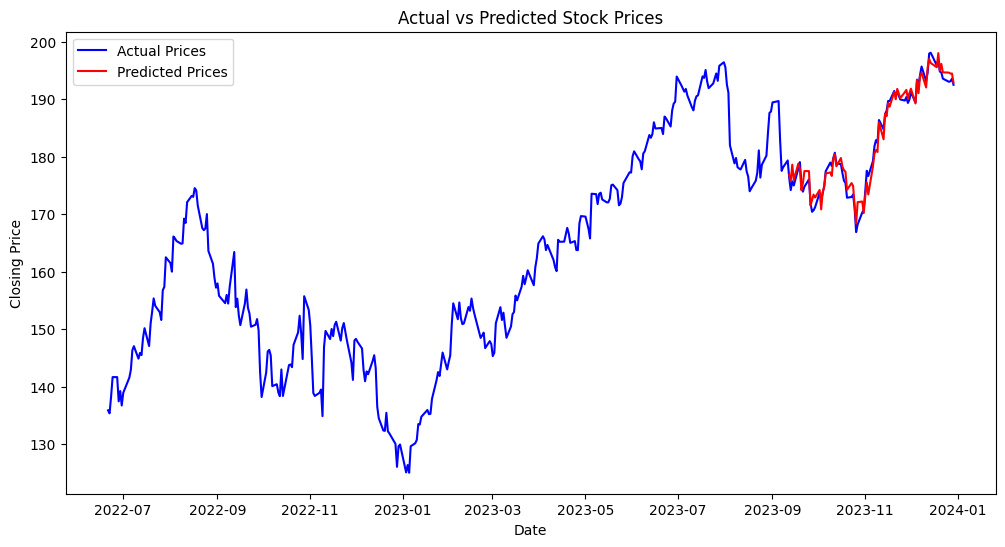

In [54]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['closing_price'], label='Actual Prices', color='blue')
plt.plot(df['date'].iloc[-len(y_test):], y_pred, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()